In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines

In [15]:
data_folder = "data"

data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(data_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(data_folder, file_name)
        df = pd.read_csv(file_path).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)

In [16]:
data = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))

In [17]:
data.columns = ['_'.join(map(str, col)) for col in data.columns]

In [18]:
data["File name"] = file_names
data["Type"] = data["File name"].str.split("-", expand=True)[0]

In [19]:
# data_deriv = savgol_filter(data.iloc[:, :-2], window_length=25, polyorder=5, deriv=1)
# data.iloc[:, :-2] = data_deriv

In [20]:
C5_data = data.loc[data["Type"] == "C5"]
C7_data = data.loc[data["Type"] == "C7"]

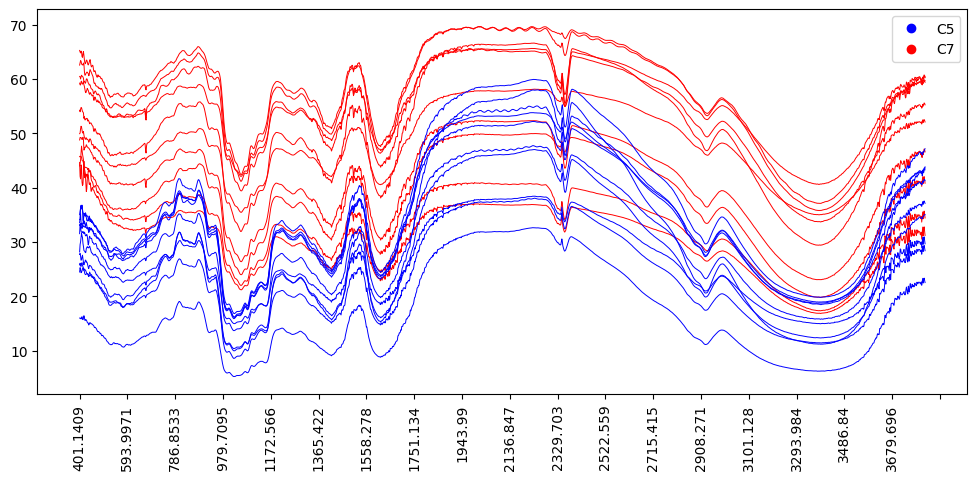

In [21]:
C5 = mlines.Line2D([], [], color='blue', marker='o', ls='', label='C5')
C7 = mlines.Line2D([], [], color='red', marker='o', ls='', label='C7')
plt.figure(figsize=(12, 5))
plt.plot(C5_data.iloc[:, :-100].T, linewidth = 0.7, c  = 'r')
plt.plot(C7_data.iloc[:, :-100].T, linewidth = 0.7, c  = 'b')
plt.gca().set_xticks(np.arange(0, len(data.columns), 100))
plt.xticks(rotation=90)
plt.legend(handles=[C5, C7])

plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(data["Type"])

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Encode the labels
le = LabelEncoder()
label = le.fit_transform(data["Type"])


In [24]:
le.classes_

array(['C5', 'C7'], dtype=object)

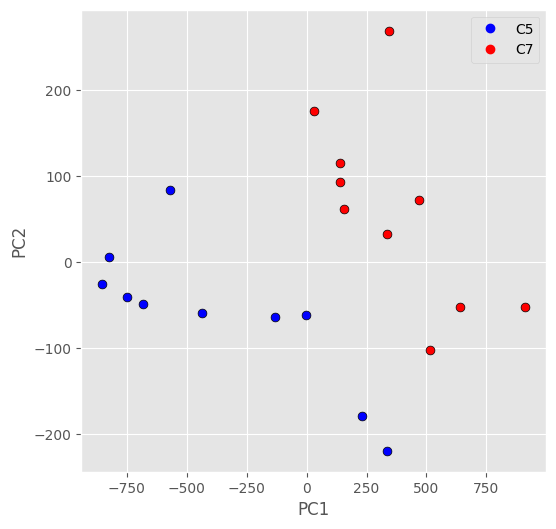

In [25]:

pca = PCA(2)
pca_data = pca.fit_transform(data.iloc[:, :-2])
plt.figure(figsize=(6,6))
C5 = mlines.Line2D([], [], color='blue', marker='o', ls='', label='C5')
C7 = mlines.Line2D([], [], color='red', marker='o', ls='', label='C7')
# plt.grid()
with plt.style.context(('ggplot')):

    plt.scatter(pca_data[label == 0][:, 0], pca_data[label == 0][:, 1], c='blue', edgecolors='k', s = 40)
    plt.scatter(pca_data[label == 1][:, 0], pca_data[label == 1][:, 1], c='red', edgecolors='k', s = 40)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(handles=[C5, C7])
    plt.show()